# YOLOv8 Object Detection Pipeline

This notebook demonstrates the complete workflow for training, validating, testing, and deploying a YOLOv8 object detection model. The workflow includes:

- Installing necessary libraries  
- Splitting datasets into training, validation, and test sets  
- Training the model  
- Evaluating and visualizing results  
- Saving and packaging the trained model  
- Running real-time detection on webcam and video  
- Deploying a web interface using Streamlit  

---

## Installing Required Libraries

Install essential Python packages for YOLOv8 and image handling:


In [ ]:
!pip3 install pillow
!pip3 install pyyaml
!pip3 install ultralytics

Pillow: For image loading and processing

PyYAML: For dataset configuration files

Ultralytics: YOLOv8 framework

## Dataset Preparation

Split the dataset into training, validation, and test sets using a helper script:

In [2]:
!python train_val_split.py --datapath="dataset" --train_pct=0.70 --val_pct=0.15 --test_pct=0.15

Total images: 5000
Train: 3500, Val: 750, Test: 750
✅ data.yaml created!


--datapath: Path to your dataset folder

--train_pct: Percentage of data for training

--val_pct: Percentage for validation

--test_pct: Percentage for testing

This ensures a proper dataset split for training and evaluation.

## &nbsp;Model Training

Train YOLOv8 on the prepared dataset:

In [ ]:
!yolo detect train data=data.yaml model=yolo11s.pt epochs=30 imgsz=640

Ultralytics 8.3.189 🚀 Python-3.13.7 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5804MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

data: Path to dataset YAML file (contains paths and class info)

model: Base model to fine-tune (yolo11s.pt)

epochs: Number of training iterations

imgsz: Input image size

The trained weights will be saved under runs/detect/train/weights/best.pt.

## Model Testing / Inference

Run the model on the test images to check predictions:

In [4]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/test/images save=True conf=0.25

Ultralytics 8.3.189 🚀 Python-3.13.7 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5804MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/750 /home/archlinux/Desktop/Projects/CV/data/test/images/hard_hat_workers1.png: 640x640 9 helmets, 9.0ms
image 2/750 /home/archlinux/Desktop/Projects/CV/data/test/images/hard_hat_workers1001.png: 640x640 4 helmets, 9.2ms
image 3/750 /home/archlinux/Desktop/Projects/CV/data/test/images/hard_hat_workers1002.png: 640x640 4 helmets, 8.3ms
image 4/750 /home/archlinux/Desktop/Projects/CV/data/test/images/hard_hat_workers1011.png: 640x640 2 helmets, 9.8ms
image 5/750 /home/archlinux/Desktop/Projects/CV/data/test/images/hard_hat_workers1015.png: 640x640 1 helmet, 9.1ms
image 6/750 /home/archlinux/Desktop/Projects/CV/data/test/images/hard_hat_workers1017.png: 640x640 2 helmets, 1 head, 11.3ms
image 7/750 /home/archlinux/Desktop/Projects/CV/data/test/images/hard_hat_workers1019.png: 640x640 6 helmet

source: Path to test images

save=True: Saves images with bounding boxes

conf=0.25: Confidence threshold for detections

### Displaying Sample Predictions

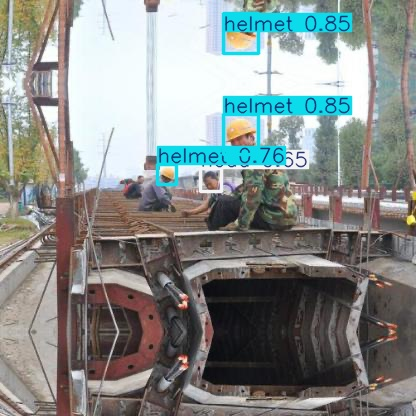

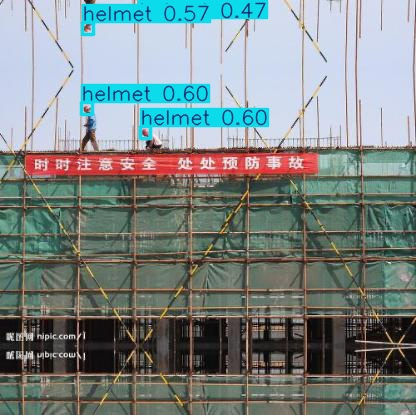

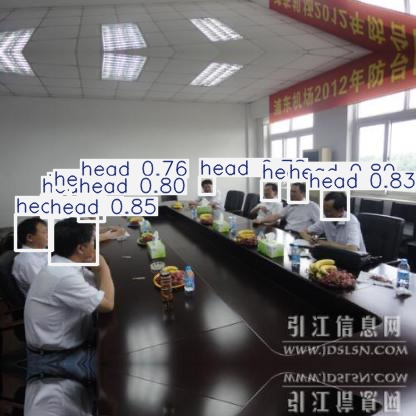

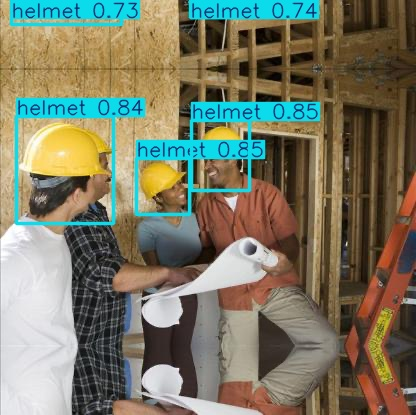

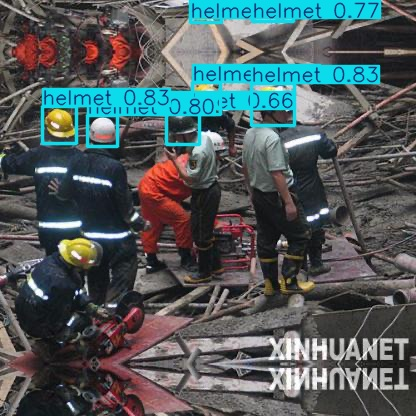

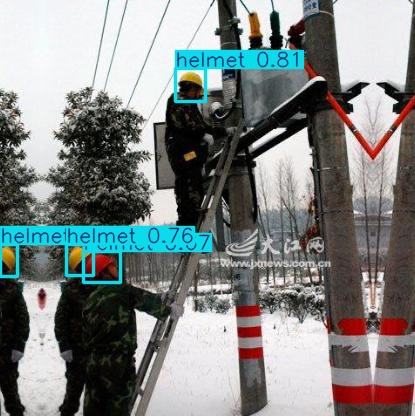

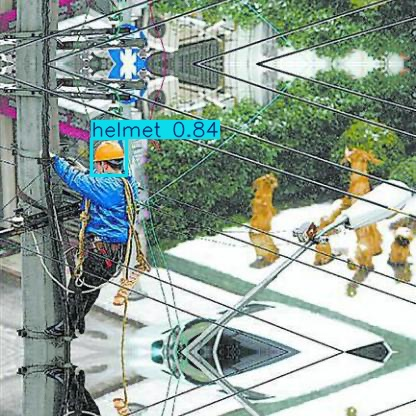

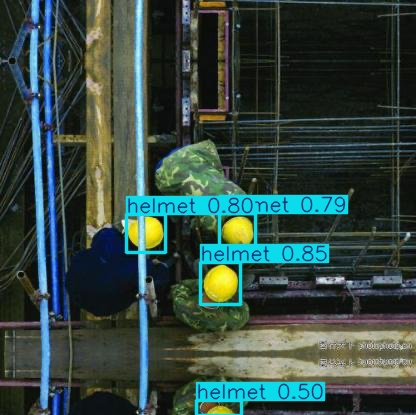

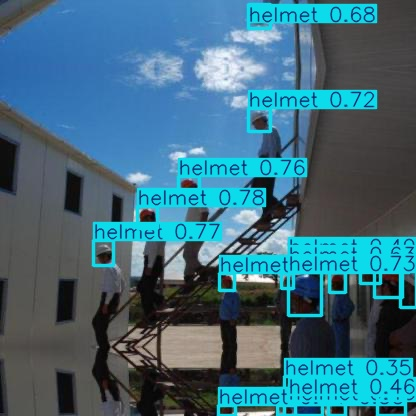

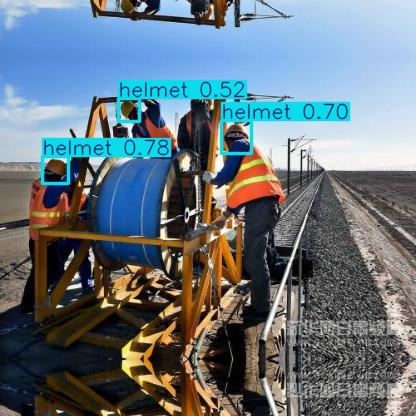

In [6]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

This allows you to visually inspect the quality of predictions.

## Model Validation

Evaluate the trained model on the validation dataset:

In [5]:
!yolo val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.189 🚀 Python-3.13.7 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5804MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3665.3±346.3 MB/s, size: 198.2 KB)
val: Scanning /home/archlinux/Desktop/Projects/CV/data/validation/labels.cache... 750 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 750/750 9390232.8it/s 0.0ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 47/47 6.3it/s 7.4s
                   all        750       3857      0.949      0.595      0.632      0.423
                person         21        112          1          0     0.0128    0.00539
                helmet        691       2895      0.935      0.909      0.962      0.642
                  head        140        850      0.911      0.878      0.921      0.623
Speed: 0.3ms preprocess, 5.5ms inference, 0.0ms loss, 1.8ms postprocess per

Computes precision, recall, and mAP metrics

Helps confirm model performance before deployment

## Saving and Packaging the Model


Create a folder for the trained model and results, and zip it for sharing:

In [7]:
# Create "my_model" folder to store model weights and train results
!mkdir my_model
!cp runs/detect/train/weights/best.pt my_model/my_model.pt
!cp -r runs/detect/train my_model

# Zip into "my_model.zip"
%cd my_model
!zip my_model.zip my_model.pt
!zip -r my_model.zip train

/home/archlinux/Desktop/Projects/CV/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/train_batch0.jpg (deflated 1%)
  adding: train/BoxP_curve.png (deflated 13%)
  adding: train/results.png (deflated 8%)
  adding: train/labels.jpg (deflated 31%)
  adding: train/val_batch0_pred.jpg (deflated 6%)
  adding: train/val_batch1_pred.jpg (deflated 6%)
  adding: train/train_batch2.jpg (deflated 2%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/train_batch4381.jpg (deflated 8%)
  adding: train/train_batch4382.jpg (deflated 6%)
  adding: train/train_batch4380.jpg (deflated 8%)
  adding: train/results.csv (deflated 61%)
  adding: train/BoxPR_curve.png (deflated 16%)
  adding: train/args.yaml (deflated 53%)
  adding: train/BoxR_curve.png (deflated 12%)
  adding: train/train_batch1.jpg (deflated 2%)
  adding: train/val_batch1_labels.jpg (deflated 6%)
  adding: t

my_model.zip now contains the model and all training artifacts.

## Real-time Object Detection

### Webcam Detection


Run YOLOv11 on a live webcam feed:

In [ ]:
!python yolo_detect.py --model my_model.pt --source usb0 --resolution 1280x720

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/archlinux/Desktop/Projects/CV/venv/lib/python3.13/site-packages/cv2/qt/plugins"
Average pipeline FPS: 10.03


source=usb0: Use default webcam

resolution: Capture resolution for detection

### Video file detection

Run YOLOv11 on a saved video:

In [ ]:
!python yolo_detect.py --model my_model.pt --source '../video.mp4' --resolution 1280x720

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/archlinux/Desktop/Projects/CV/venv/lib/python3.13/site-packages/cv2/qt/plugins"
Reached end of the video file. Exiting program.
Average pipeline FPS: 43.22


source: Path to video file

Outputs will be saved in the prediction folder

### Deployment via Streamlit

Run a web interface for interactive YOLOv8 inference:

In [1]:
!streamlit run /home/archlinux/Desktop/Projects/CV/streamlit-inference.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.6:8501

Ultralytics Solutions: ✅ {'model': '/home/archlinux/Desktop/Projects/CV/my_model/my_model.pt'}
Ultralytics Solutions: ✅ {'model': '/home/archlinux/Desktop/Projects/CV/my_model/my_model.pt'}
Ultralytics Solutions: ✅ {'model': '/home/archlinux/Desktop/Projects/CV/my_model/my_model.pt'}
Ultralytics Solutions: ✅ {'model': '/home/archlinux/Desktop/Projects/CV/my_model/my_model.pt'}
  Stopping...
^C


Users can upload images or videos, and see predictions in real-time through a browser interface.